In [1]:
# Import all the Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests

In [2]:
#Obesity is the cleaned data set
np.random.seed(103)
Obesity= pd.read_csv('/Users/rohitmalhotra/Desktop/TeamProject /Obesity/Data/Processed/ObesityDataSet_cleaned.csv')

In [3]:
#see the column names
col = Obesity.columns
print(col)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


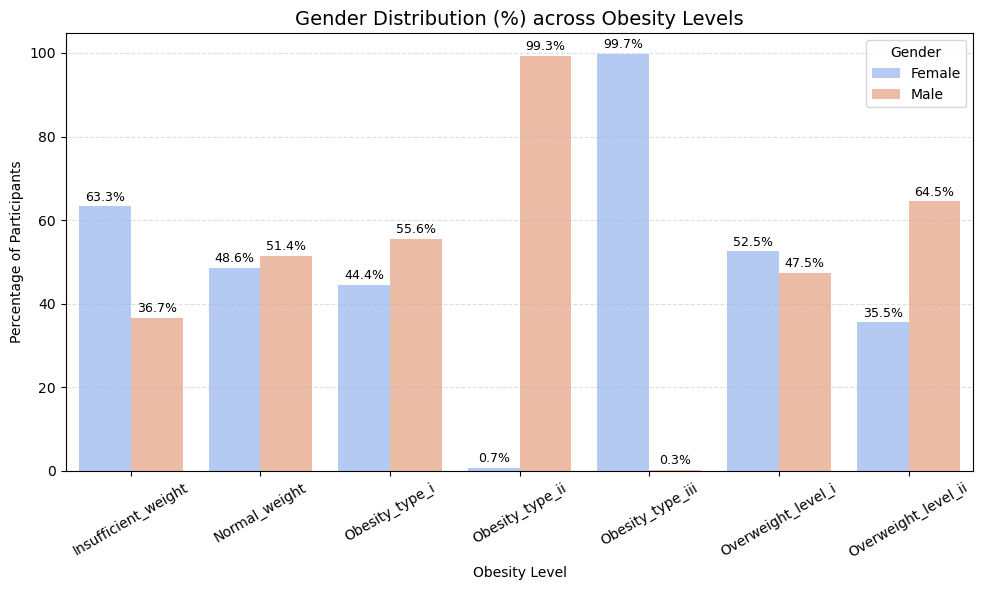

In [16]:

# Calculate gender percentage within each obesity level
# Calculate gender counts
gender_percentages = (
    Obesity.groupby(['NObeyesdad', 'Gender'], observed=True)
    .size()
    .reset_index(name='Count')
)

# Calculate percentages s
gender_percentages['Percentage'] = (
    gender_percentages['Count'] / 
    gender_percentages.groupby('NObeyesdad', observed=True)['Count'].transform('sum') * 100)
 
gender_percentages


plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=gender_percentages,
    x='NObeyesdad',
    y='Percentage',
    hue='Gender',
    palette='coolwarm'
)

# Add percentage labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

plt.title('Gender Distribution (%) across Obesity Levels', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Percentage of Participants')
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [18]:
#Compute BMI
# Assuming 'Height' is in meters and 'Weight' is in kilograms

Obesity['BMI'] = Obesity['Weight'] / (Obesity['Height'] ** 2)


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_63841/932638195.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Obesity, x='NObeyesdad', y='BMI', palette='coolwarm')


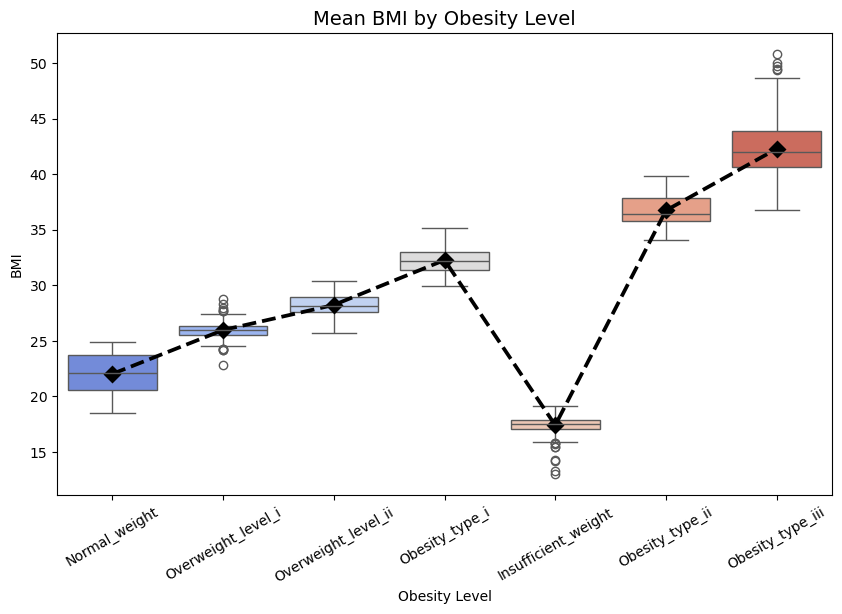

In [21]:
# Visualization — BMI vs Obesity Level
# Boxplot (clean comparison of medians & spread)

mean_bmi = Obesity.groupby('NObeyesdad')['BMI'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.boxplot(data=Obesity, x='NObeyesdad', y='BMI', palette='coolwarm')
sns.pointplot(data=mean_bmi, x='NObeyesdad', y='BMI', color='black', markers='D', linestyles='--')
plt.title('Mean BMI by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('BMI')
plt.xticks(rotation=30)
plt.show()

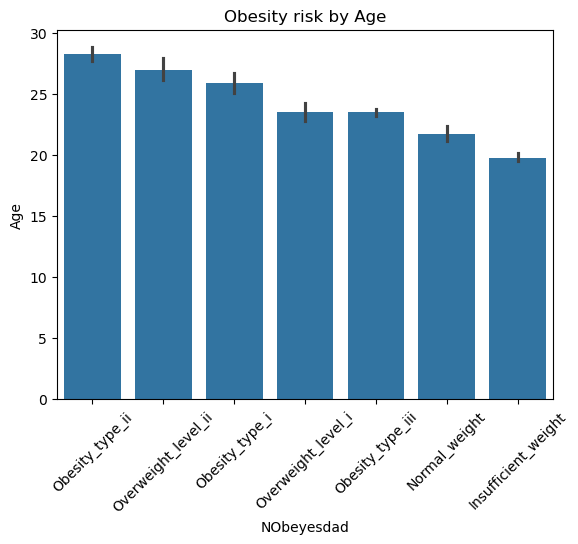

In [51]:
#Obesity risk by age

# Sort the data by 'Age' for each 'NObeyesdad'
order = Obesity.groupby('NObeyesdad')['Age'].mean().sort_values(ascending=False).index

# Create the barplot with sorted order
sns.barplot(data=Obesity, x='NObeyesdad', y='Age', order=order)

plt.xticks(rotation=45)
plt.title("Obesity risk by Age")
plt.show()


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_63841/3218138996.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_63841/3218138996.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(


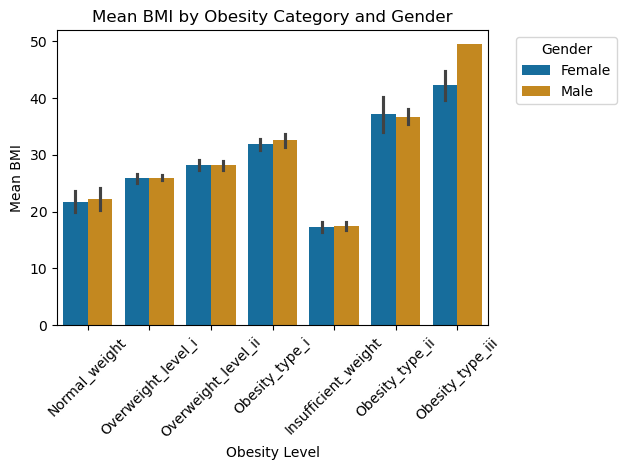

In [47]:


# Set an accessible color palette
palette = sns.color_palette("colorblind")

# Create the barplot
sns.barplot(
    data=Obesity,
    x='NObeyesdad',       # Obesity category
    y='BMI',               # Numeric BMI
    hue='Gender',          # Color by gender
    ci='sd',               # Show standard deviation as error bars
    palette=palette,
    order=Obesity['NObeyesdad'].unique()  # Optional: specify order of categories
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Titles and labels
plt.title("Mean BMI by Obesity Category and Gender")
plt.xlabel("Obesity Level")
plt.ylabel("Mean BMI")

# Move legend outside the plot (optional)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


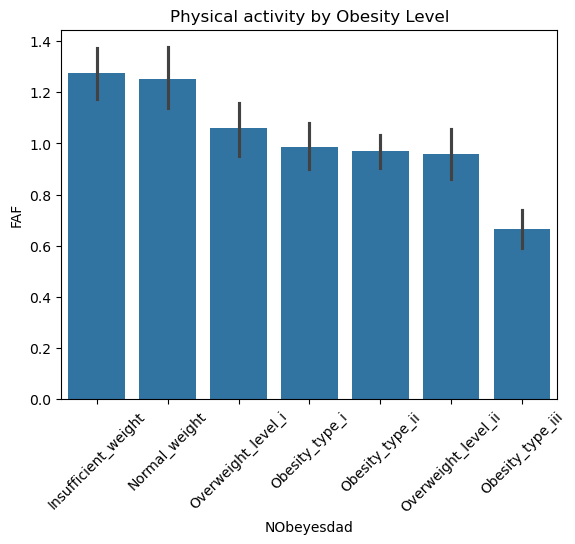

In [40]:
#Physical activity by obesity level

# Sort the data by 'FAF' for each 'NObeyesdad'
order = Obesity.groupby('NObeyesdad')['FAF'].mean().sort_values(ascending=False).index

# Create the barplot with sorted order
sns.barplot(data=Obesity, x='NObeyesdad', y='FAF', order=order)

plt.xticks(rotation=45)
plt.title("Physical activity by Obesity Level")
plt.show()


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_63841/974067366.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Obesity, x='NObeyesdad', y='TUE', order=order,palette=sns.color_palette("pastel"))
/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_63841/974067366.py:7: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=Obesity, x='NObeyesdad', y='TUE', order=order,palette=sns.color_palette("pastel"))


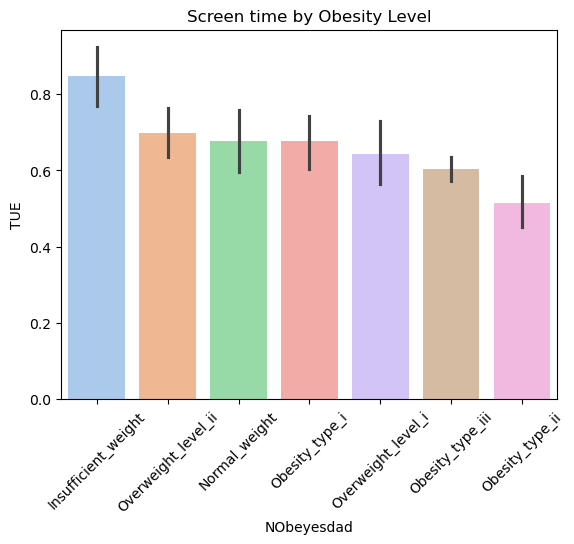

In [46]:
#Screen time by obesity level

# Sort the data by 'TUE' for each 'NObeyesdad'
order = Obesity.groupby('NObeyesdad')['TUE'].mean().sort_values(ascending=False).index

# Create the barplot with sorted order
sns.barplot(data=Obesity, x='NObeyesdad', y='TUE', order=order,palette=sns.color_palette("pastel"))

plt.xticks(rotation=45)
plt.title("Screen time by Obesity Level")
plt.show()


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_63841/2760292926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Obesity, x='NObeyesdad', y='FCVC', order=order, palette=sns.color_palette("colorblind"))
/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_63841/2760292926.py:7: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(data=Obesity, x='NObeyesdad', y='FCVC', order=order, palette=sns.color_palette("colorblind"))


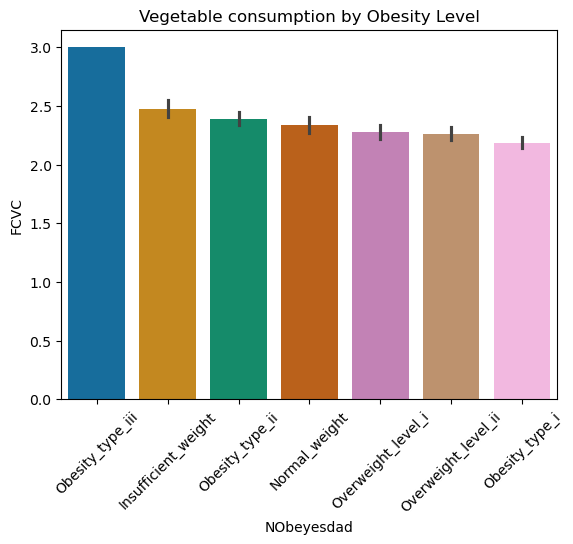

In [42]:
#Vegetable consumption by obesity level

# Sort the data by 'FCVC' for each 'NObeyesdad'
order = Obesity.groupby('NObeyesdad')['FCVC'].mean().sort_values(ascending=False).index

# Create the barplot with sorted order
sns.barplot(data=Obesity, x='NObeyesdad', y='FCVC', order=order, palette=sns.color_palette("colorblind"))

plt.xticks(rotation=45)
plt.title("Vegetable consumption by Obesity Level")
plt.show()

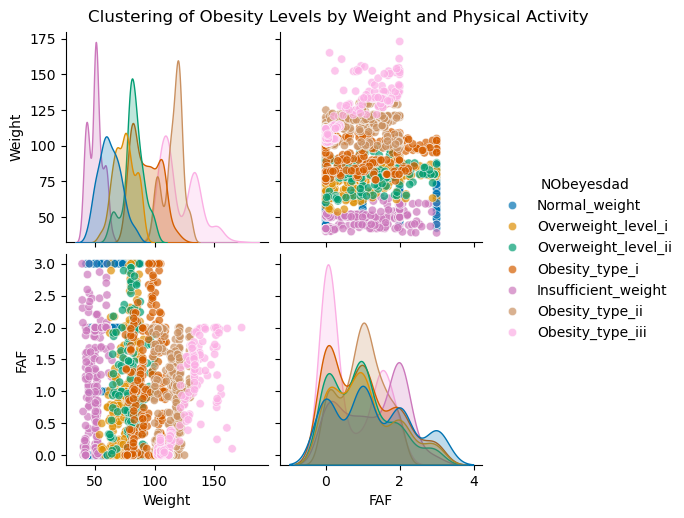

In [52]:
#Obesity levels cluster based on weight and activity

# Select relevant columns
cols = ['Weight', 'FAF', 'NObeyesdad']

# Create pairplot
sns.pairplot(
    Obesity[cols],
    hue='NObeyesdad',            # Color points by obesity category
    palette='colorblind',         # Accessible palette
    diag_kind='kde',              # Density plot on diagonal
    plot_kws={'alpha':0.7}        # Slight transparency for overlapping points
)

plt.suptitle("Clustering of Obesity Levels by Weight and Physical Activity", y=1.02)
plt.show()
